In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from utils.ubx import filter_ubx_event
from utils.streams import populate_streams

%matplotlib inline
plt.style.use('ggplot')


In [2]:
stream_root_folder = r"C:\Users\neurogears\Desktop\EC_datasets\BenchmarkRun2022_09_22_10_30_02"

#session_time = datetime.datetime.strptime(stream_root_folder.split('\\')[-1], '%Y_%m_%d_%H_%M_%S')
#streams = populate_streams(stream_root_folder)

import pickle

#with open('benchmark.pickle', 'wb') as handle:
#    pickle.dump(streams, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('benchmark.pickle', 'rb') as handle:
    streams = pickle.load(handle)

### Attempt to load all datastreams to check data integrity

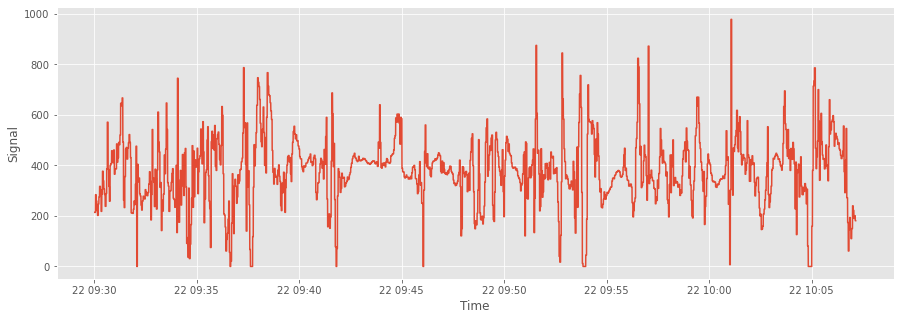

In [3]:
stream = streams.TK.CO2V2.CO2Conc.data
fig = plt.figure(figsize=(15,5))
plt.xlabel("Time")
plt.ylabel("Signal")
plt.plot((stream))

(0.0, 1024.0)

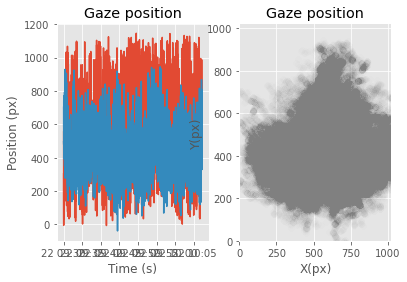

In [4]:
pupil_data = streams.PupilLabs.LSLSampleArray.data

ax1 = plt.subplot(121)
ax1.plot(pupil_data.index, pupil_data.iloc[:,0], label = "X")
ax1.plot(pupil_data.index,pupil_data.iloc[:,1], label = "Y")
ax1.set_ylabel("Position (px)")
ax1.set_xlabel("Time (s)")
ax1.set_title("Gaze position")

ax2 = plt.subplot(122)
ax2.scatter(pupil_data.iloc[:,0],pupil_data.iloc[:,1], c = "gray", alpha = 0.01)
ax2.set_ylabel("Y(px)")
ax2.set_xlabel("X(px)")
ax2.set_title("Gaze position")
ax2.set_ylim((0, 1024))
ax2.set_xlim((0, 1024))


In [5]:
streams.UBX.data


,Message,Identity,Class,Id,Length
Seconds,,,,,
2022-09-22 09:30:01.677979946,"<UBX(ESF-RAW, reserved1=840622004, data_01=b'\...",ESF-RAW,ESF,RAW,60
2022-09-22 09:30:01.677979946,"<UBX(ESF-MEAS, timeTag=840621999, timeMarkSent...",ESF-MEAS,ESF,MEAS,24
2022-09-22 09:30:01.677979946,"<UBX(ESF-MEAS, timeTag=840621994, timeMarkSent...",ESF-MEAS,ESF,MEAS,28
2022-09-22 09:30:01.677979946,"<UBX(ESF-RAW, reserved1=840622014, data_01=b'\...",ESF-RAW,ESF,RAW,60
2022-09-22 09:30:01.677979946,"<UBX(ESF-RAW, reserved1=840622024, data_01=b'\...",ESF-RAW,ESF,RAW,60
...,...,...,...,...,...
2022-09-22 10:07:08.618979931,"<UBX(ESF-RAW, reserved1=842848873, data_01=b'\...",ESF-RAW,ESF,RAW,60
2022-09-22 10:07:08.618979931,"<UBX(ESF-MEAS, timeTag=842848867, timeMarkSent...",ESF-MEAS,ESF,MEAS,24
2022-09-22 10:07:08.618979931,"<UBX(ESF-MEAS, timeTag=842848862, timeMarkSent...",ESF-MEAS,ESF,MEAS,28


In [6]:
streams.Accelerometer.data

,Orientation.X,Orientation.Y,Orientation.Z,Gyroscope.X,Gyroscope.Y,Gyroscope.Z,LinearAccl.X,LinearAccl.Y,LinearAccl.Z,Magnetometer.X,...,Accl.Z,Gravitiy.X,Gravitiy.Y,Gravitiy.Z,SysCalibEnabled,GyroCalibEnabled,AccCalibEnabled,MagCalibEnabled,Temperature,SoftwareTimestamp
Seconds,,,,,,,,,,,,,,,,,,,,,
2022-09-22 09:30:02.679999828,59.69,8.25,-113.69,0.02,-0.01,0.01,-0.03,0.00,-0.10,-22.25,...,-4.00,1.40,8.88,-3.90,False,False,False,False,0,2022-09-22 09:30:02.694980145
2022-09-22 09:30:02.699999809,59.69,8.25,-113.69,0.03,-0.02,0.01,-0.01,-0.02,-0.11,-22.25,...,-4.01,1.40,8.88,-3.90,False,False,False,False,0,2022-09-22 09:30:02.713980198
2022-09-22 09:30:02.719999790,59.69,8.25,-113.75,0.03,-0.01,0.02,-0.03,-0.05,-0.12,36.06,...,-4.04,1.40,8.88,-3.91,False,False,False,False,0,2022-09-22 09:30:02.731999874
2022-09-22 09:30:02.739999771,59.69,8.25,-113.81,0.04,-0.02,0.02,-0.05,-0.06,-0.14,36.06,...,-4.06,1.41,8.87,-3.92,False,False,False,False,0,2022-09-22 09:30:02.754980087
2022-09-22 09:30:02.760000229,59.69,8.25,-113.88,0.03,-0.01,0.02,-0.10,-0.01,-0.07,36.06,...,-4.00,1.41,8.87,-3.92,False,False,False,False,0,2022-09-22 09:30:02.771999836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-22 10:07:08.539999962,190.94,6.31,-113.69,-0.06,0.25,-0.06,0.25,0.18,0.10,41.50,...,-3.80,1.08,8.92,-3.91,False,False,False,False,0,2022-09-22 10:07:08.552000046
2022-09-22 10:07:08.559999943,190.56,6.38,-113.56,-0.04,0.22,-0.04,0.31,0.25,0.07,41.50,...,-3.82,1.09,8.92,-3.90,False,False,False,False,0,2022-09-22 10:07:08.573979855
2022-09-22 10:07:08.579999924,190.25,6.50,-113.50,-0.01,0.20,-0.03,0.32,0.34,0.15,41.50,...,-3.73,1.11,8.93,-3.89,False,False,False,False,0,2022-09-22 10:07:08.592000008


In [7]:
streams.Empatica.data.E4_Tag
## Load mic

,Stream,E4_Seconds,Value
Seconds,,,
2022-09-22 09:30:48.423999786,E4_Tag,1956-09-21 09:30:49.256860018,1.282021e+09
2022-09-22 09:30:52.338980198,E4_Tag,1956-09-21 09:30:53.210170031,1.282038e+09


In [ ]:
## Validate synch approach
#Get TIM
tim_tp = streams.UBX.filter_event("TIM-TP") #1sec heartbeat
tim_tm2 = streams.UBX.filter_event("TIM-TM2") # TTL
utc_time = streams.UBX.filter_event("NAV-TIMEUTC") #utc time

tim_tm2.insert(tim_tm2.shape[1], "RisingEdge", tim_tm2.apply(lambda x : x.loc["Message"].towMsR, axis = 1), False)
tim_tm2.insert(tim_tm2.shape[1], "FallingEdge", tim_tm2.apply(lambda x : x.loc["Message"].towMsF, axis = 1), False)
tim_tm2.insert(tim_tm2.shape[1], "isNewRisingEdge", tim_tm2.apply(lambda x : x.loc["Message"].newRisingEdge == 1, axis = 1), False)
tim_tm2.insert(tim_tm2.shape[1], "isNewFallingEdge", tim_tm2.apply(lambda x : x.loc["Message"].newFallingEdge == 1, axis = 1), False)

risingEdgeEvents = tim_tm2["RisingEdge"].drop_duplicates(keep = 'first')


## In Harp...
harp_sync = streams.BioData.Set.data
harp_sync = harp_sync[harp_sync["Value"].values & 3 > 0]





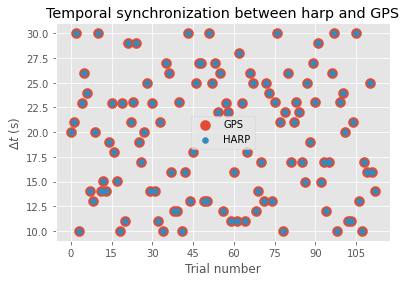

In [ ]:
## Plot both
plt.figure()
plt.title("Temporal synchronization between harp and GPS")
plt.scatter(np.arange(len(risingEdgeEvents)-1), np.diff(risingEdgeEvents.values)*1e-3, 100,label = "GPS")
plt.scatter(np.arange(len(harp_sync)-1), np.diff(harp_sync.index)/np.timedelta64(1, 's'), label = "HARP")

ax = plt.gca()
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('$\Delta t$ (s)')
plt.xlabel('Trial number')
plt.legend()
plt.show()


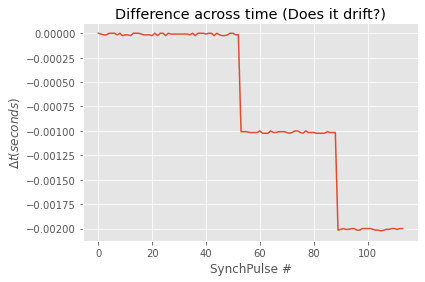

In [ ]:
harp_sync_ts = (harp_sync.index - harp_sync.index[0]) / np.timedelta64(1, 's')
gps_sync_ts = risingEdgeEvents.values*1e-3
gps_sync_ts = gps_sync_ts - gps_sync_ts[0]

plt.figure()
plt.plot((harp_sync_ts - gps_sync_ts))
plt.xlabel("SynchPulse #")
plt.ylabel("$\Delta t (seconds)$")
plt.title("Difference across time (Does it drift?)")
plt.show()

Text(0.5, 1.0, 'b1 = 1.0000011330874252\nb0 = -0.0004860999586071557\nr2 = 0.9999999999998936')

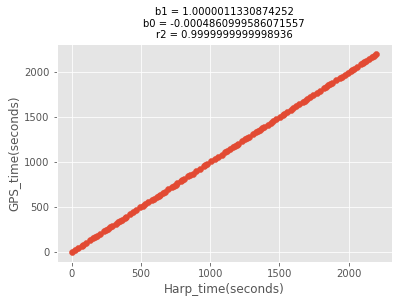

In [ ]:
## Another way to do it is to check the regression slope
from scipy import stats
plt.figure()
plt.scatter(harp_sync_ts, gps_sync_ts)
plt.xlabel("Harp_time(seconds)")
plt.ylabel("GPS_time(seconds)")

slope, intercept, r, p, std_err = stats.linregress(harp_sync_ts, gps_sync_ts)
plt.title((f'b1 = {slope}\nb0 = {intercept}\nr2 = {r}'), fontsize = 10)



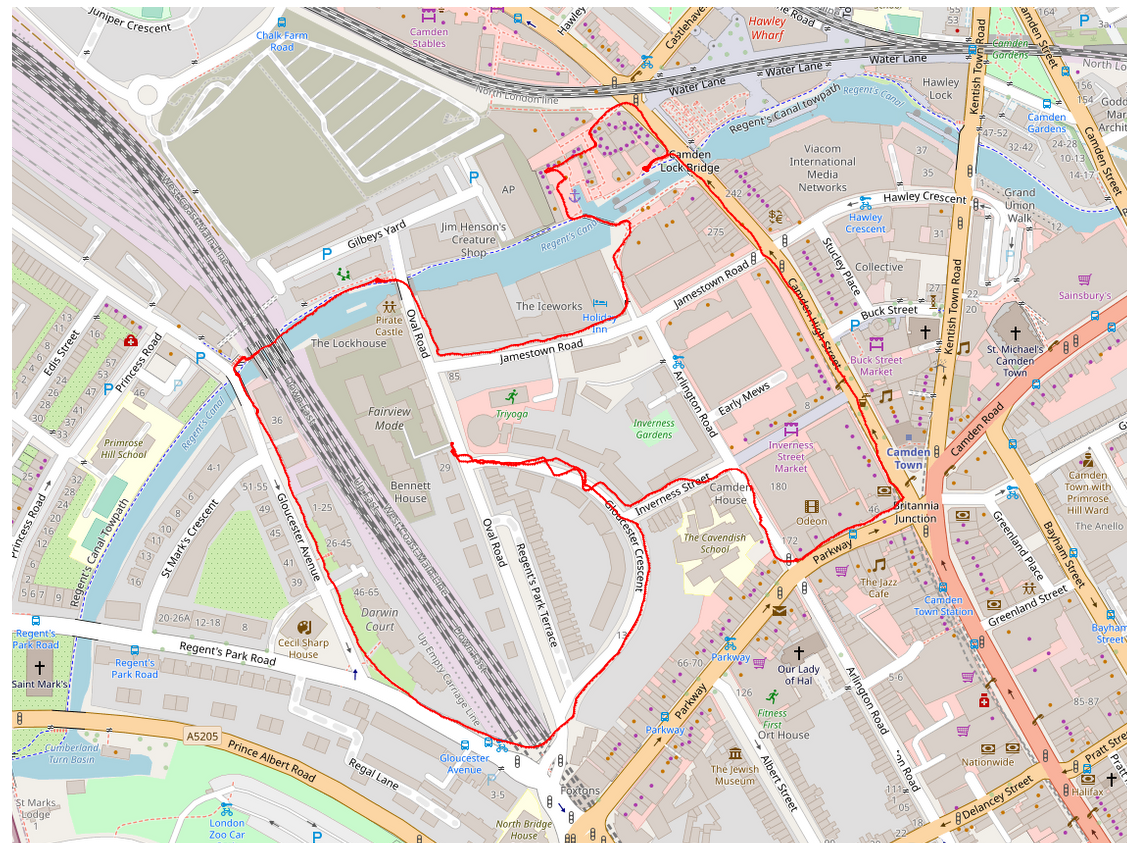

In [19]:
## Plot position data
import geopandas as gpd
import tilemapbase
#tilemapbase.init(create=True) #Must run the first time to create the cache file
NavData = streams.UBX.filter_event("NAV-HPPOSLLH")

NavData.insert(NavData.shape[1], "Lat", NavData.apply(lambda x : x.Message.lat, axis = 1), False)
NavData.insert(NavData.shape[1], "Lon", NavData.apply(lambda x : x.Message.lon, axis = 1), False)
NavData.insert(NavData.shape[1], "Height", NavData.apply(lambda x : x.Message.height, axis = 1), False)
NavData.insert(NavData.shape[1], "Time", NavData.apply(lambda x : x.Message.iTOW, axis = 1), False)

coord = gpd.points_from_xy(NavData['Lon'], NavData['Lat'], NavData['Height'])
gdf = gpd.GeoDataFrame(geometry=coord, crs='epsg:4326')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(20,20)
tiles = tilemapbase.tiles.build_OSM()
extent = tilemapbase.Extent.from_lonlat(np.min(NavData['Lon'].values), np.max(NavData['Lon'].values),
                                        np.min(NavData['Lat'].values), np.max(NavData['Lat'].values))
extent = extent.to_aspect(4/3).with_scaling(0.6)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plotter = tilemapbase.Plotter(extent, tiles, width=600)
plotter.plot(ax)

path = [tilemapbase.project(x,y) for x,y in zip(NavData['Lon'].values, NavData['Lat'].values)]
x, y = zip(*path)

#ax.scatter(point[0], point[1], c = 'r', s = 200)
ax.plot(x,y,"ro-", markersize=1)

if False:
    def load_pos_file(path):
        df = pd.read_table(path, sep='\s+', parse_dates={'Timestamp': [0, 1]}, skiprows=23)
        return df

    posdata = load_pos_file(r"C:\Users\neurogears\Desktop\EC_datasets\BenchmarkRun2022_09_22_10_30_02\GPS&GALL.pos")
    path = [tilemapbase.project(x,y) for x,y in zip(posdata['longitude(deg)'], posdata['latitude(deg)'])]
    x, y = zip(*path)
    ax.plot(x,y,"go-", markersize=1)

plt.show()



In [ ]:
import gmplot

gmap3 = gmplot.GoogleMapPlotter(30.3164945,
                                78.03219179999999, 13)

# scatter method of map object
# scatter points on the google map
gmap3.scatter(NavData['Lat'].values, NavData['Lon'].values , '# FF0000',
                              size = 40, marker = False )

# Plot method Draw a line in
# between given coordinates
gmap3.plot(NavData['Lat'].values, NavData['Lon'].values, 
           'cornflowerblue', edge_width = 2.5)

gmap3.draw("map13.html")

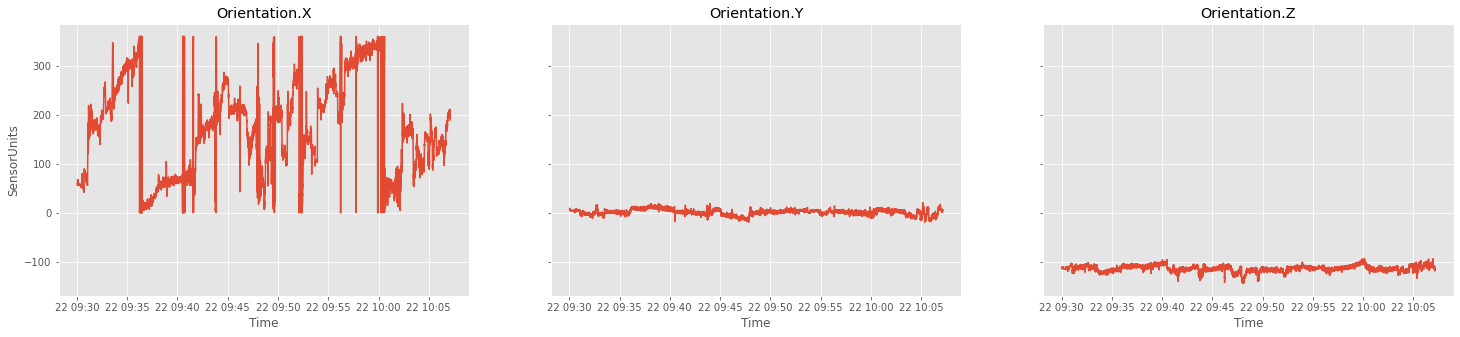

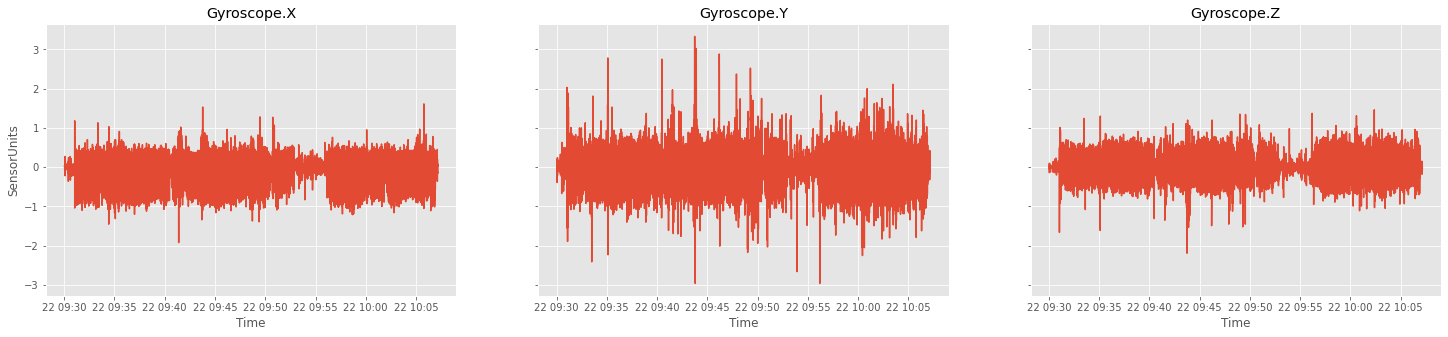

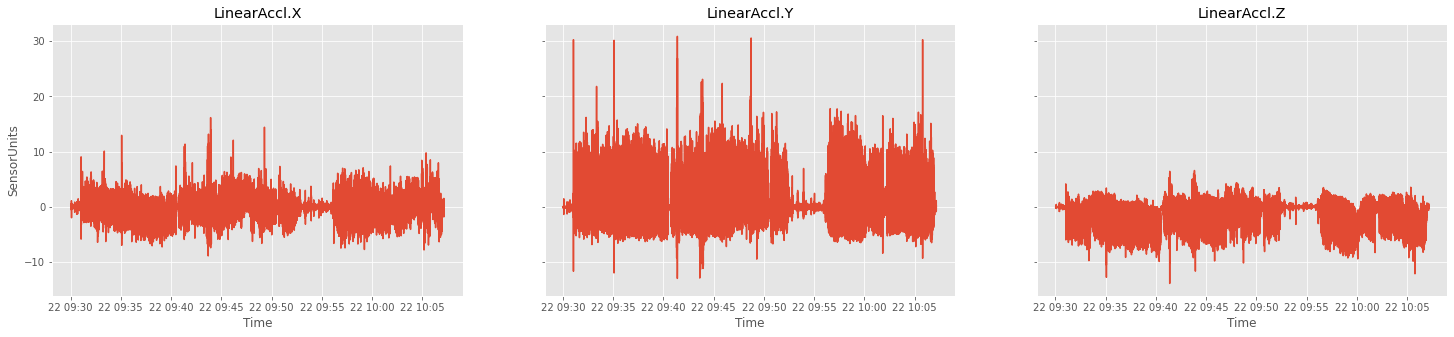

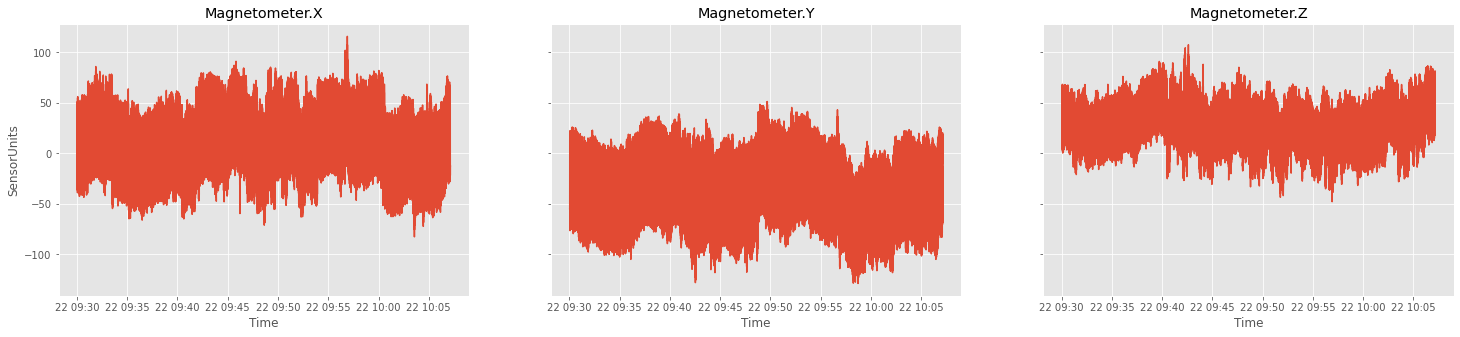

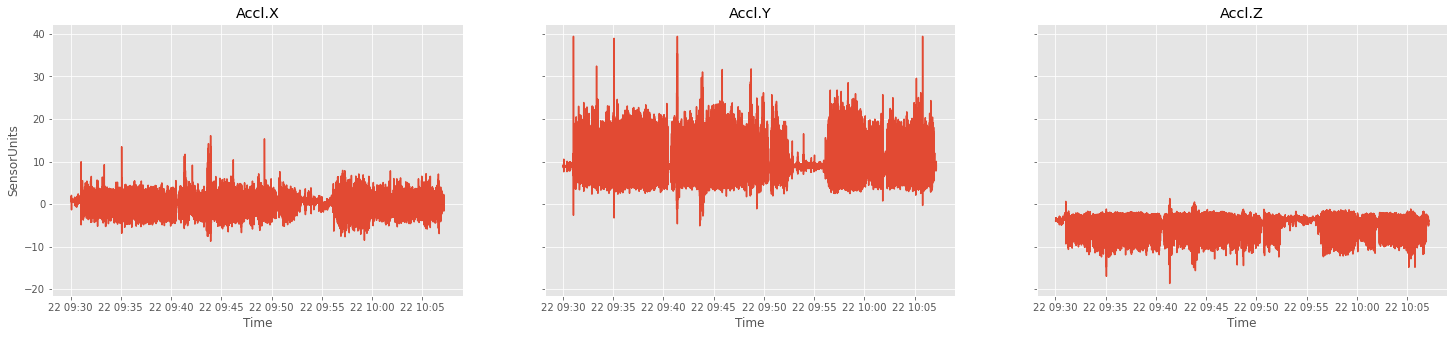

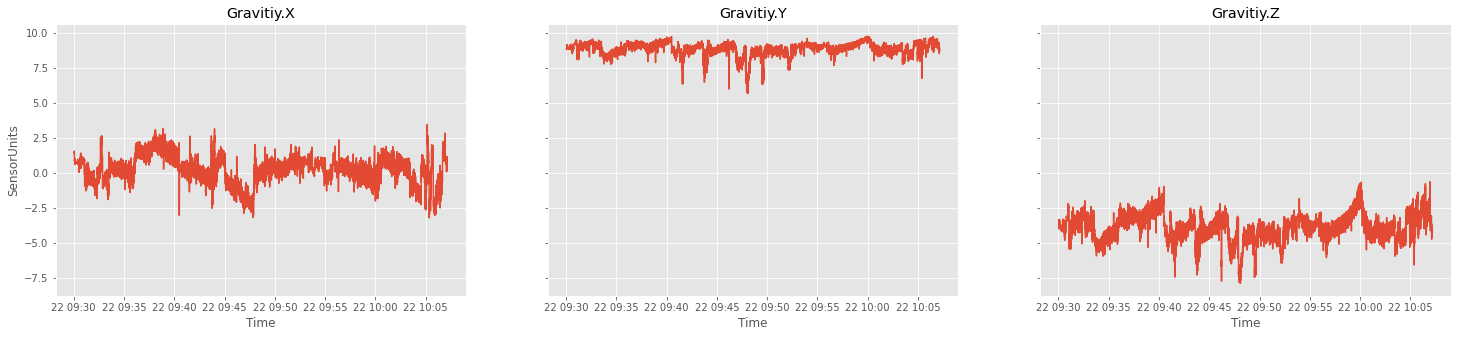

In [54]:
#Read accelarometer from HARP
sensors = ['Orientation', 'Gyroscope', 'LinearAccl', 'Magnetometer', 'Accl', 'Gravitiy']
toplot = ["X", "Y", "Z"]

for sensor in sensors:
    fig, axs = plt.subplots(nrows=1, ncols=len(toplot), sharex=True, sharey=True)
    fig.set_size_inches((25,5))
    for idx,item in enumerate(toplot):
        axs[idx].plot(streams.Accelerometer.data.index, streams.Accelerometer.data[sensor + "." + item].values)
        axs[idx].set_title(sensor + "." + item)
        axs[idx].set_xlabel("Time")
    axs[0].set_ylabel("SensorUnits")
    plt.show()


In [99]:
## Heart Rate during the walk
input_data = streams.Accelerometer.data['Orientation.X']
sampling_dt = datetime.timedelta(seconds = 2)
resampled_NavData = NavData.loc[:,"Lat":"Height"].resample(sampling_dt, origin='start').mean()
resampled_NavData['Data'] = np.NAN
for i in np.arange(len(resampled_NavData)-1):
    resampled_NavData['Data'].iloc[i] = (input_data[
        (input_data.index >= resampled_NavData.index[i]) &
        (input_data.index < resampled_NavData.index[i+1])]).mean()



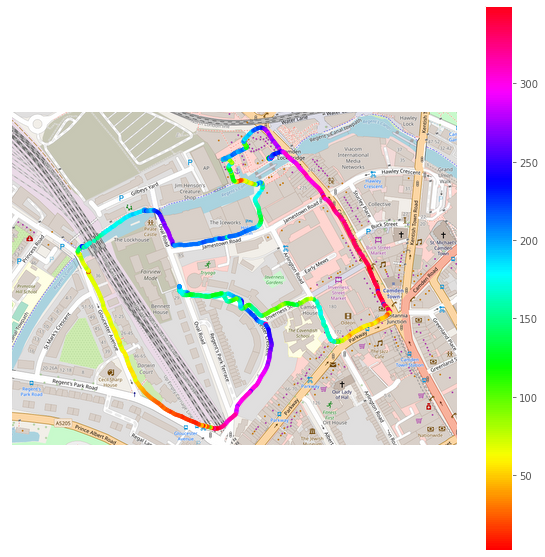

In [108]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = plt.gca()
tiles = tilemapbase.tiles.build_OSM()
extent = tilemapbase.Extent.from_lonlat(np.min(resampled_NavData['Lon'].values), np.max(resampled_NavData['Lon'].values),
                                        np.min(resampled_NavData['Lat'].values), np.max(resampled_NavData['Lat'].values))
extent = extent.to_aspect(4/3).with_scaling(0.7)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plotter = tilemapbase.Plotter(extent, tiles, width=600)
plotter.plot(ax)

path = [tilemapbase.project(x,y) for x,y in zip(resampled_NavData['Lon'].values, resampled_NavData['Lat'].values)]
x, y = zip(*path)

plt.scatter(x, y, c = resampled_NavData['Data'].values, s =15, cmap = 'hsv' )
plt.colorbar()
plt.show()

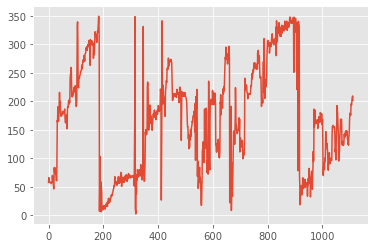

In [101]:
plt.figure()
plt.plot(resampled_NavData['Data'].values)

In [49]:
## Heart Rate during the walk
sampling_dt = datetime.timedelta(seconds = 5)
offset_0 = NavData.index.values[0]
resampled_NavData = NavData.resample(sampling_dt, origin='epoch', offset=offset_0).interpolate(method = 'linear')
resampled_NavData['HR'] = np.NAN
for i in np.arange(len(resampled_NavData)):
    timeslice = (peaks.index >= resampled_NavData.index[i] - sampling_dt/2) & (peaks.index < resampled_NavData.index[i] + sampling_dt/2)
    peaksslice = peaks[timeslice]
    resampled_NavData['HR'].iloc[i] = (len(peaksslice) / sampling_dt.total_seconds())
resampled_NavData['HR'] = resampled_NavData['HR'] * 60 #in bpms

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
tiles = tilemapbase.tiles.build_OSM()
extent = tilemapbase.Extent.from_lonlat(np.min(resampled_NavData['Lon'].values), np.max(resampled_NavData['Lon'].values),
                                        np.min(resampled_NavData['Lat'].values), np.max(resampled_NavData['Lat'].values))
extent = extent.to_aspect(4/3).with_scaling(0.7)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plotter = tilemapbase.Plotter(extent, tiles, width=600)
plotter.plot(ax)

path = [tilemapbase.project(x,y) for x,y in zip(resampled_NavData['Lon'].values, resampled_NavData['Lat'].values)]
x, y = zip(*path)

ax.scatter(x, y, c = resampled_NavData['HR'].values, s =15, cmap = 'jet' )
plt.show()

Index(['Orientation.X', 'Orientation.Y', 'Orientation.Z', 'Gyroscope.X',
       'Gyroscope.Y', 'Gyroscope.Z', 'LinearAccl.X', 'LinearAccl.Y',
       'LinearAccl.Z', 'Magnetometer.X', 'Magnetometer.Y', 'Magnetometer.Z',
       'Accl.X', 'Accl.Y', 'Accl.Z', 'Gravitiy.X', 'Gravitiy.Y', 'Gravitiy.Z',
       'SysCalibEnabled', 'GyroCalibEnabled', 'AccCalibEnabled',
       'MagCalibEnabled', 'Temperature', 'SoftwareTimestamp'],
      dtype='object')

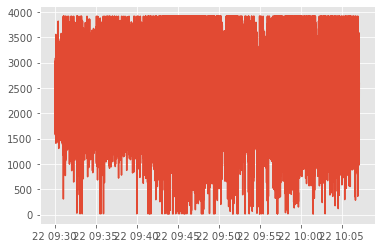

In [13]:
## Load biodata

ecg = streams.BioData.ECG.data
#ecg.index = (ecg.index - ecg.index[0])

ecg = ecg["Value0"].iloc[np.arange(len(ecg))[::4]].astype(np.float64)
plt.figure()
plt.plot(ecg)
plt.show()


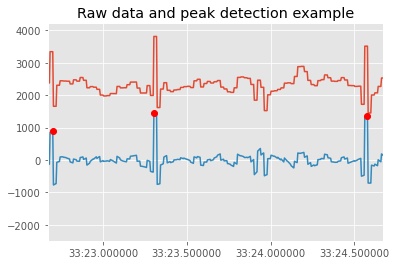

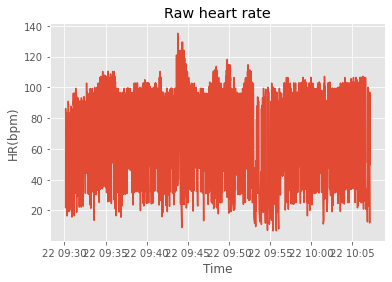

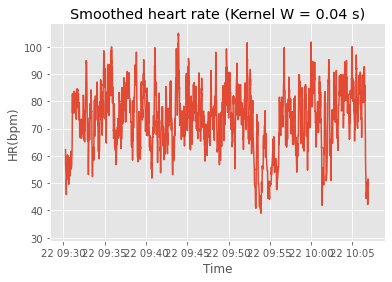

In [14]:
#This should not be necessary as the acquisition rate seems pretty stable, but just in case....
fs = 250.0
resmaple_rate = datetime.timedelta(seconds = 1.0/fs) #Period (1/Hz)
resampled = ecg.resample(resmaple_rate).interpolate(method = 'linear')
#High-pass the signal
import utils.processing as ecup
resampled = ecup.butter_highpass_filter(ecg,5,fs)

from scipy import signal, convolve
#Assume maximum HR of 300bpm ~ 5Hz ~ 0.2 Seconds
peaks, _  = signal.find_peaks(resampled, height = 800, distance = 0.4 * fs )


plt.figure()
plt.plot(ecg.index, ecg.values)
plt.plot(ecg.index, resampled)
plt.plot(ecg.index[peaks], resampled[peaks], 'ro')
plt.xlim((ecg.index[50000], ecg.index[50500]))
plt.title('Raw data and peak detection example')
plt.show()

plt.figure()
HR = (fs/np.diff(peaks)) * 60
plt.plot(ecg.index[peaks[1:]], HR)
plt.xlabel("Time")
plt.ylabel("HR(bpm)")
plt.title('Raw heart rate')
plt.show()

plt.figure()
w = 10
HR = np.convolve(HR, np.ones(w), 'same') / w
HR[0:int(w/2)+1] = np.NaN
HR[-int(w/2)-1:-1] = np.NaN

plt.plot(ecg.index[peaks[1:]], HR)
plt.xlabel("Time")
plt.ylabel("HR(bpm)")
plt.title(f'Smoothed heart rate (Kernel W = {w/fs} s)')
plt.show()

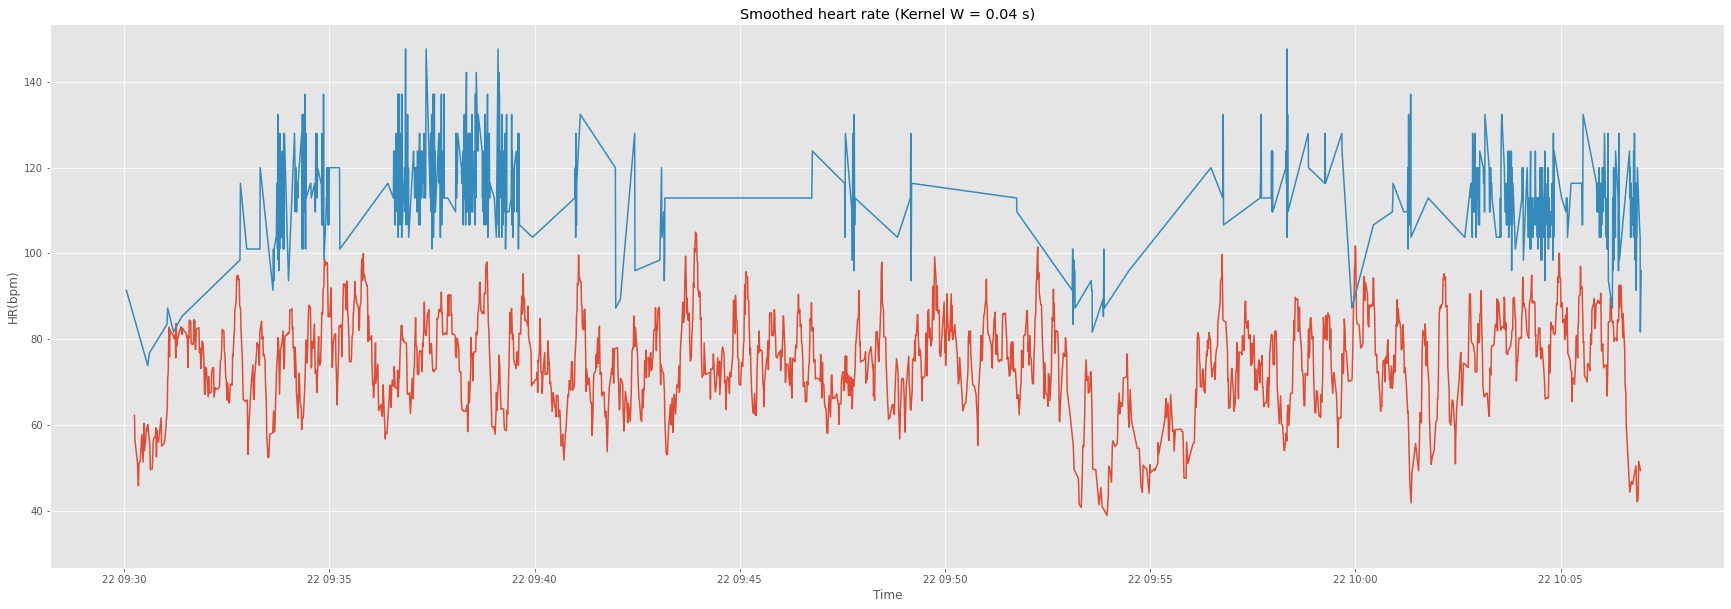

In [16]:
plt.figure(figsize=(30,10))
plt.plot(ecg.index[peaks[1:]], HR)
plt.plot(streams.Empatica.data.E4_Hr['Value'])
plt.xlabel("Time")
plt.ylabel("HR(bpm)")
plt.title(f'Smoothed heart rate (Kernel W = {w/fs} s)')
plt.show()

In [27]:
## Heart Rate during the walk
sampling_dt = datetime.timedelta(seconds = 5)
offset_0 = NavData.index.values[0]
resampled_NavData = NavData.resample(sampling_dt, origin='epoch', offset=offset_0).interpolate(method = 'linear')
resampled_NavData['HR'] = np.NAN
for i in np.arange(len(resampled_NavData)):
    timeslice = (peaks.index >= resampled_NavData.index[i] - sampling_dt/2) & (peaks.index < resampled_NavData.index[i] + sampling_dt/2)
    peaksslice = peaks[timeslice]
    resampled_NavData['HR'].iloc[i] = (len(peaksslice) / sampling_dt.total_seconds())
resampled_NavData['HR'] = resampled_NavData['HR'] * 60 #in bpms

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
tiles = tilemapbase.tiles.build_OSM()
extent = tilemapbase.Extent.from_lonlat(np.min(resampled_NavData['Lon'].values), np.max(resampled_NavData['Lon'].values),
                                        np.min(resampled_NavData['Lat'].values), np.max(resampled_NavData['Lat'].values))
extent = extent.to_aspect(4/3).with_scaling(0.7)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plotter = tilemapbase.Plotter(extent, tiles, width=600)
plotter.plot(ax)

path = [tilemapbase.project(x,y) for x,y in zip(resampled_NavData['Lon'].values, resampled_NavData['Lat'].values)]
x, y = zip(*path)

ax.scatter(x, y, c = resampled_NavData['HR'].values, s =15, cmap = 'jet' )
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [28]:
peaks

array([   712,   1397,   1571, ..., 555927, 556082, 556383], dtype=int64)